In [27]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['savefig.dpi'] = 200
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np
import pyNN.nest as sim

In [23]:
sim.EIF_cond_exp_isfa_ista.default_parameters

{'a': 4.0,
 'b': 0.0805,
 'cm': 0.281,
 'delta_T': 2.0,
 'e_rev_E': 0.0,
 'e_rev_I': -80.0,
 'i_offset': 0.0,
 'tau_m': 9.3667,
 'tau_refrac': 0.1,
 'tau_syn_E': 5.0,
 'tau_syn_I': 5.0,
 'tau_w': 144.0,
 'v_reset': -70.6,
 'v_rest': -70.6,
 'v_spike': -40.0,
 'v_thresh': -50.4}

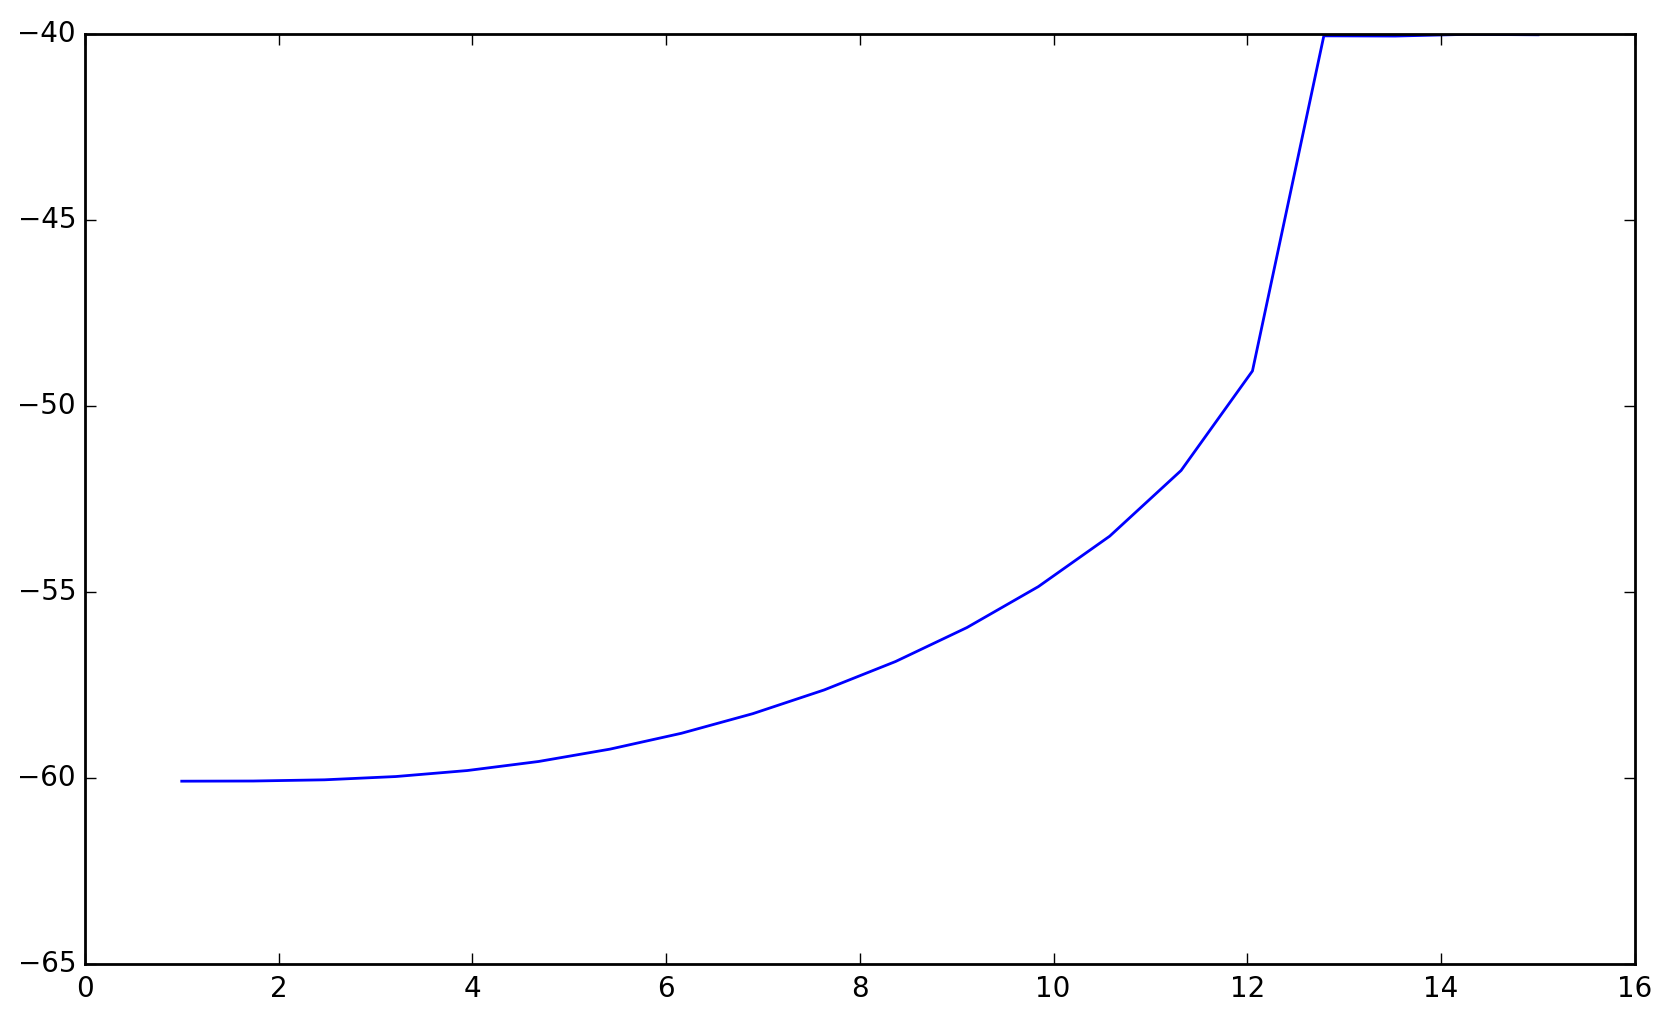

In [78]:
u_max = []
delta_Ts = np.linspace(1,15,20)
for delta_T in delta_Ts:
    neuron_parameters={
        'delta_T': delta_T
    }
    t_sim = 1000
    dt = 0.1
    f_exc = 10
    f_inh = 10
    weight = 0.1
    t_inh_start = 100
    t_inh_end = t_inh_start+300
    current = -4
    sim.setup(timestep=dt, min_delay=0.1)
    pulse = sim.DCSource(amplitude=current, start=t_inh_start, stop=t_inh_end)
    pop = sim.Population(1, sim.EIF_cond_exp_isfa_ista(**neuron_parameters))
    pop.record_v()
    pulse.inject_into(pop)
    sim.run(t_sim)
    u = pop.get_data('v').segments[0].analogsignalarrays[0][:,0]
    sim.end()
    u_max.append(np.max(u))
#    fig, axs = plt.subplots(2,1)
#    axs[0].plot(u)
#    heaviside = lambda t: 0.5 * (np.sign(t) + 1)
#    t = np.linspace(0,t_sim,1000)
#    axs[1].plot(t,current*heaviside(t-t_inh_start)*heaviside(-(t-t_inh_end)), c='red')
plt.plot(delta_Ts, u_max)
plt.xlabel('value of $\Delta_T$')
plt.ylabel('membrane potential mV')

We observe thtat the membrane potential increases with an increasing value of $\Delta_T$ until it reaches a maximal value. Since this is the reset potential we know that the neuron is spiking at this value of $\Delta_T$. Therefore we have an astimate for the necessary parameters to simulate an inhibitory rebound.

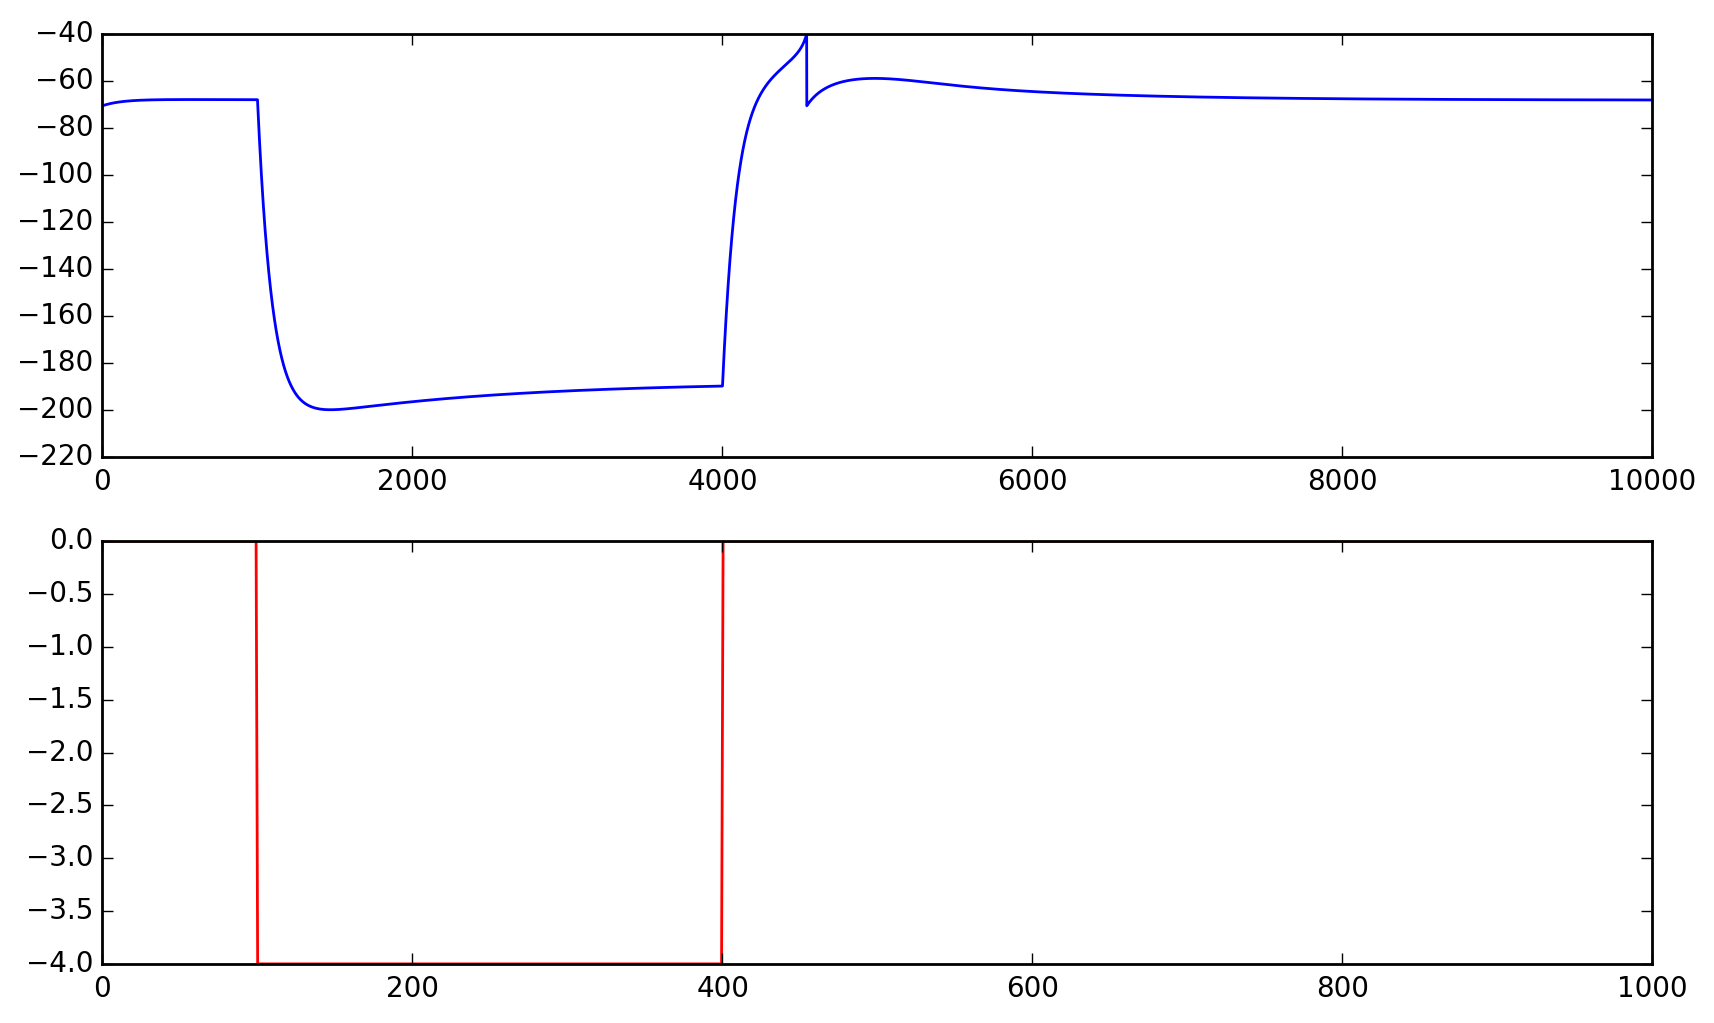

In [83]:
neuron_parameters={
    'delta_T': 10,
    'v_thresh': -55,
}
t_sim = 1000
dt = 0.1
f_exc = 10
f_inh = 10
weight = 0.1
t_inh_start = 100
t_inh_end = t_inh_start+300
current = -4
sim.setup(timestep=dt, min_delay=0.1)
pulse = sim.DCSource(amplitude=current, start=t_inh_start, stop=t_inh_end)
pop = sim.Population(1, sim.EIF_cond_exp_isfa_ista(**neuron_parameters))
pop.record_v()
pulse.inject_into(pop)
sim.run(t_sim)
u = pop.get_data('v').segments[0].analogsignalarrays[0][:,0]
sim.end()
u_max.append(np.max(u))
fig, axs = plt.subplots(2,1)
axs[0].plot(u)
heaviside = lambda t: 0.5 * (np.sign(t) + 1)
t = np.linspace(0,t_sim,1000)
axs[1].plot(t,current*heaviside(t-t_inh_start)*heaviside(-(t-t_inh_end)), c='red')